In [1]:
# Importing needed libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)




In [2]:
# Reading the csv file 

df = pd.read_csv('movies.csv')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
# General info about the Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [4]:
# General Statistical information about the Dataset

df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [5]:
# Checking for any missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(percent_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [6]:
# Casting the Budget and the Gross as int64 to remove the .0 at the end of each number

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
# Creating a new column with the correct year of release
# The reason behind is that the year and the release year sometimes don't match

df['correct_year'] = df['released'].astype('str').str[:4] 

In [8]:
df.shape

(6820, 16)

In [9]:
# Dropping all duplicates

df.drop_duplicates(inplace=True)

In [10]:
# Identifying the company with the highest generated revenue 

CompanyGrossSumRevenue = df.groupby('company')[['gross']].sum()
CompanyGrossSumRevenue = CompanyGrossSumRevenue.sort_values('gross',ascending=False)[:15]
CompanyGrossSumRevenue

,gross
company,
Warner Bros.,21322318408
Universal Pictures,19430051320
Paramount Pictures,17115702495
Twentieth Century Fox Film Corporation,14788570587
Walt Disney Pictures,10455507123
Columbia Pictures,8824216545
New Line Cinema,8540112287
Columbia Pictures Corporation,7720114061
Touchstone Pictures,6688156475


In [11]:
# Z-score to check for outliers 
# Rule of thumb: Anything greater or less than 3 or -3 is considered an outlier

from scipy import stats
z = np.abs(stats.zscore(df['budget']))
z = np.mean(z)
print(z)

0.6818988361262456


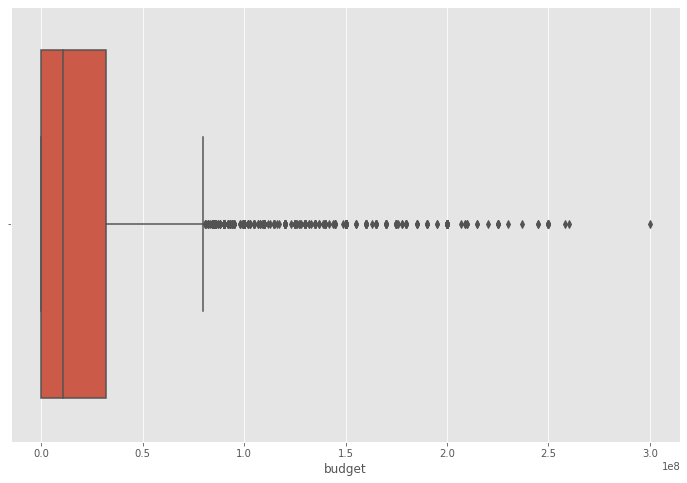

In [12]:
# Visual representation of outliers

sns.boxplot(x='budget',data=df)

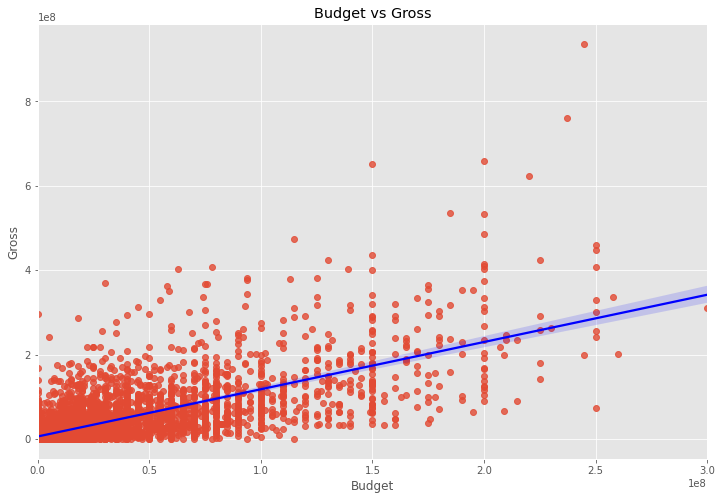

In [13]:
# Visual representation between Budget and Gross that clearly indicates a positive correlation

sns.regplot(x='budget',y='gross',data=df,line_kws={'color':'blue'})
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [14]:
# Pearson Correlation

df.corr(method='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [15]:
# Kendall Correlation

df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [16]:
# Spearman Correlation

df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


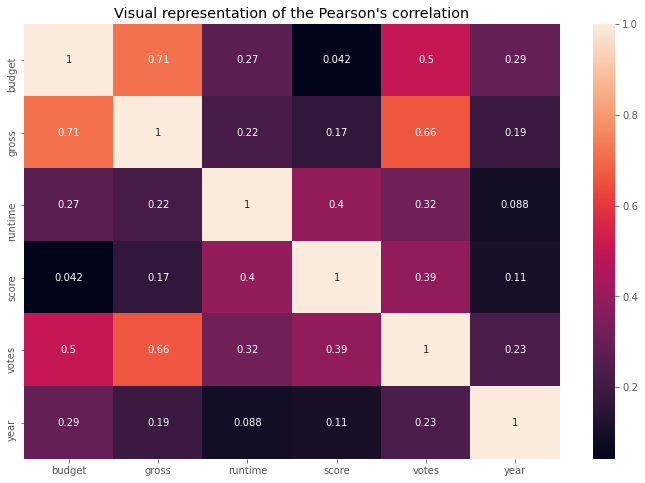

In [17]:
# Heatmap for all numerical values in the Dataset that shows correlation to one another respectively 

sns.heatmap(df.corr(),annot=True)
plt.title("Visual representation of the Pearson's correlation")
plt.show()

In [18]:
# Assigning or Numberizing object Datatypes to categorical so i can apply .cat.codes
# This allocates a number to each object datatype 
# This Step is done in order to include the other features in the correlation matrix

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


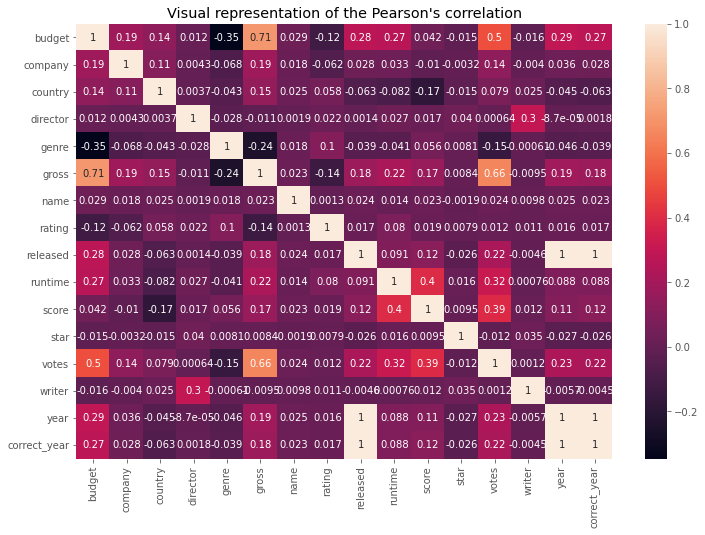

In [19]:
# A full visual representation of correlation for all features in the Dataset

sns.heatmap(df_numerized.corr(),annot=True)
plt.title("Visual representation of the Pearson's correlation")
plt.show()

In [20]:
# An easier and alternative way of reading pairs of correlation

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="Quicksort")

sorted_pairs

country       budget         -0.058972
budget        country        -0.058972
company       budget         -0.053390
budget        company        -0.053390
director      runtime        -0.048564
                                ...   
              director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [21]:
# Correlation that are greater than 0.5

strong_pairs = sorted_pairs[abs(corr_pairs) > 0.5]
strong_pairs

company       writer          0.525347
writer        company         0.525347
director      company         0.528937
company       director        0.528937
votes         company         0.556854
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
correct_year  correct_year    1.000000
Length: 102, dtype: float64